**Data science workflow for solving titanic problem**

- Question or probelm definition
- acquire training & testing data.
- Wrangle, prepare, cleanse the data.
- Analyse, identify patterns, and explore the data.
- Model, predict & solve the problem
- Visulaize, report and present the problem solving steps and final solution.
- Supply or submit the results.

**Workflow Goals:**

Classifying, Correlating, Converting, Completing, Corrrecting, Creating, Charting.

In [30]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

**Analyse Data**

In [31]:
train_df = pd.read_csv("D:/Web ML models/kaggle/titanic/data/raw/train.csv")
test_df = pd.read_csv("D:/Web ML models/kaggle/titanic/data/raw/test.csv")
combine = [train_df, test_df]

**Analyze by Describing data**

In [32]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Features:**

*Categorical*: Nominal or Ordinal or Ratio or Interval

*Numerical*: Discrete or Continuous or Timeseries

- **Categorical** - Survived, Sex, Embarked
- **Ordinal** - PClass
- **Numerical** -  
  *Continous*: Age, Fare
  *Discrete*: SibSp, parch

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Any mixed data types ?*
- Ticket - numeric & alphanumeric
- Cabin - alphanumeric

*Any errors or typos ?*
- Name may contain errors or typos

*Any blank, null or empty values? (which requires correcting)*
- Cabin, Age, Embarked - Null values
- Cabin, Age - Incomplete on test dataset

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Datatypes**
- Integer or floats - 7 on train & 6 on test.
- Strings(object) - 5

**Distribution of numerical feature values across the samples**

- Total = 891 or 40% of actual no.of passengers on board
- Survived is categorical feature (0 or 1)
- Around 38% samples survived.
- Most (>75%) did not travel with parents or cildren.
- Nearly 30% had siblings and/or spouse aboard.
- Fares varied significantly, (<1%) paying as high as $512.
- Few elderly, (<1%) within 65-80.

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Distribution of categorical features**

- Names are Unique
- Sex variable has 2 values -> 65% male
- Cabin values have several duplicates. Several passengers shared a cabin.
- Embarked has 3 values. S port is used most.
- Ticket feature has high ratio (22%) of duplicate. (unique = 681)

In [33]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Assumptions for analysis**

- **Complete** Age feature, since correlated to Survival
- **Complete** Embarked feature, since correlated to Survival or another important feature.
- Ticket feature is **dropped**, since high ratio of duplicates.
- Cabin feature is **dropped**, since highly incomplete or null values in both train & test.
- Passengerid is **dropped**, since no contribution.
- Name is **dropped**, since non-standard & no direct contribution.
- **Create new** feature = Family based on Parch & SibSp, to get total family member count.
- **Create new** feature for Age bands, to convert Continous numerical into Ordinal categorical.
- **Create new** feature = Fare range, for analysis.
- **Engineer** the Name feature to extract Title as new feature.
- Women, Children, Upper-class passengers (PClass=1) were more likely to have survived.

**Analyse by pivoting features**

- To confitm the assumptions, we analyze the feature correlations by pivoting features against each other.
- Also only for features which are categorical, ordinal or discrete.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Analyze by visualizing data:**


**Correlating numerical features**
- Correlation between numerical features like Age & **Survived**
- Histogram is useful for this case.

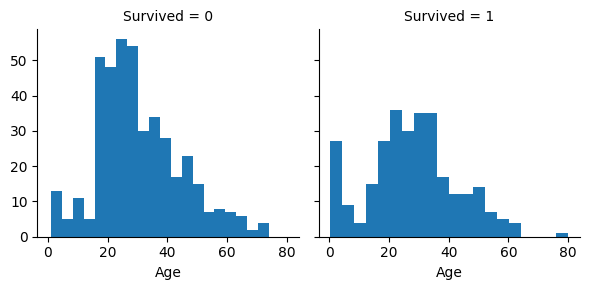

In [18]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins=20)

Observations:
- Infants (age<=4) had high survival rate
- Oldest (age=80) survived.
- Larger 15-25 old, did not survive.
- Most are in 15-35 range.

**Correlating numerical & ordinal features**
- Will combine multiple features for identifying correlations using a single plot.

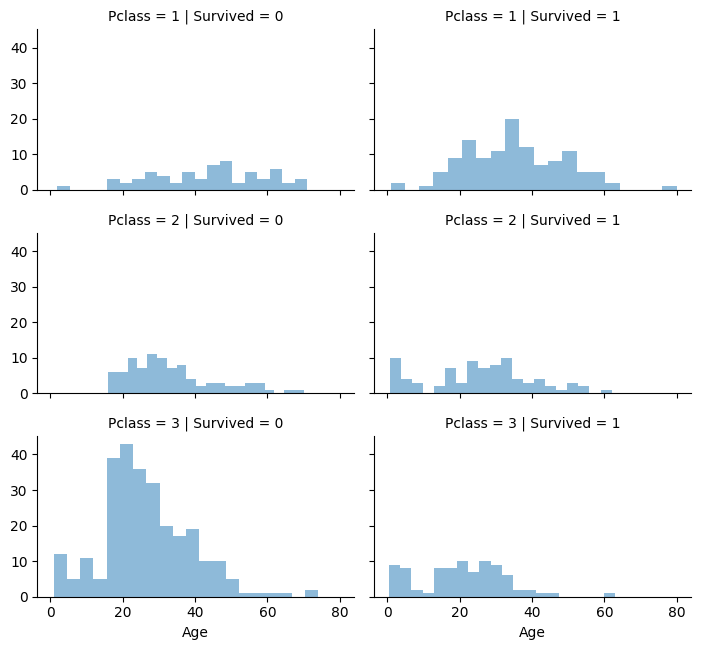

In [20]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins=20)
grid.add_legend();

Observations:
- Pclass=3 had most, but most did not survive.
- Infant in Pclass 2 & 3 mostly survived.
- Most Pclass 1 survived.
- Pclass varies in terms of Age distribution.

**Correlating categorical features**

We will correlate categorical features with "Survived".

C:\Users\kesav\anaconda3\envs\ml-streamlit\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\kesav\anaconda3\envs\ml-streamlit\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


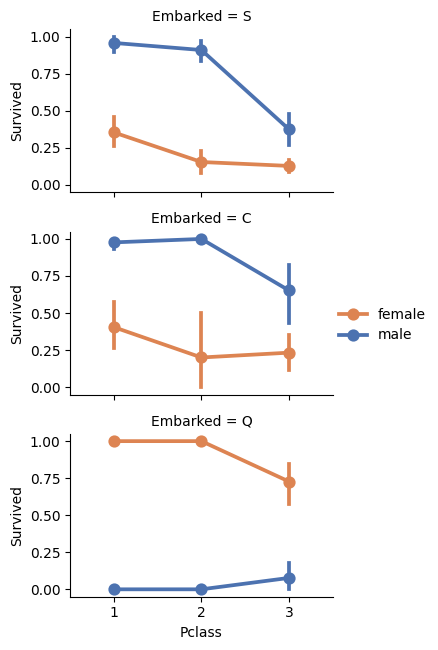

In [6]:
grid = sns.FacetGrid(train_df, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

Observations:

- Female had much better survival rate than males
- Exception in Embarked=C where males had high survival rate.
- Males had high survival rate in Pclass=3 when compared to Pclass=2 for C & Q ports
- Ports for embarkation have varying survival rate for Pclass=3

**Correlating categorical & numerical features**

Want to correlate categorical (non-numeric values) & numeric features.

C:\Users\kesav\anaconda3\envs\ml-streamlit\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


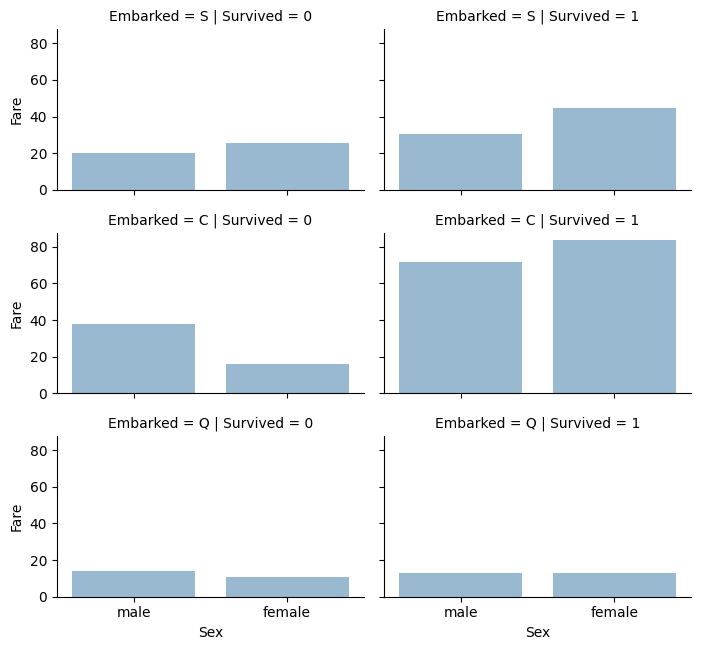

In [8]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, errorbar = None)
grid.add_legend()

Observations:

- High Fare paying had better survival.
- Port of embarkation correlates with survival rates.

**Wrangle Data**

**Correcting by dropping features**

- By dropping features we are dealing with fewer data points, which speeds up analysis
- We drop Cabin & Ticket
- When applicable we perform operations on both train & test dataset for consistency.

In [34]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


**Creating new feature - Extracting from existing**

- Analyze if Name feature can be engineered to extract titles
- Test correlation between titles & survival, before dropping Name & passengerId

Note: 
- We extract Title using "regular expressions". The RegEx pattern (\w+\.) matches first word which ends with dot character.
- The expand=False returns DataFrame

In [35]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Observation:
- Most titles band age groups accurately.
- Survival among Tittle Age bands varies slightly
- Certain caries mostly survived and some did not.

Thus will replace many titles with a more common name or classify as Rare.

In [36]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We convert the categorical titles to ordinal.

In [37]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we drop both Name & PassengerId from train & test datasets.

In [38]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

**Converting a Categorical feature**

Convert features which convert strings into numerical values. Requires by most model algorithms.

In [39]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Completing a numerical continuous feature with missing & null values**

Three methods to do this:
- Generate random numbers between mean & standard deviation.
- Guessing missing values using other correlated features median.(Eg. Guess Age values using median for Age across sets of Pclass & Gender features)
- Combine both of them.

Since 1 & 3 introduce random noise, we will use 2.

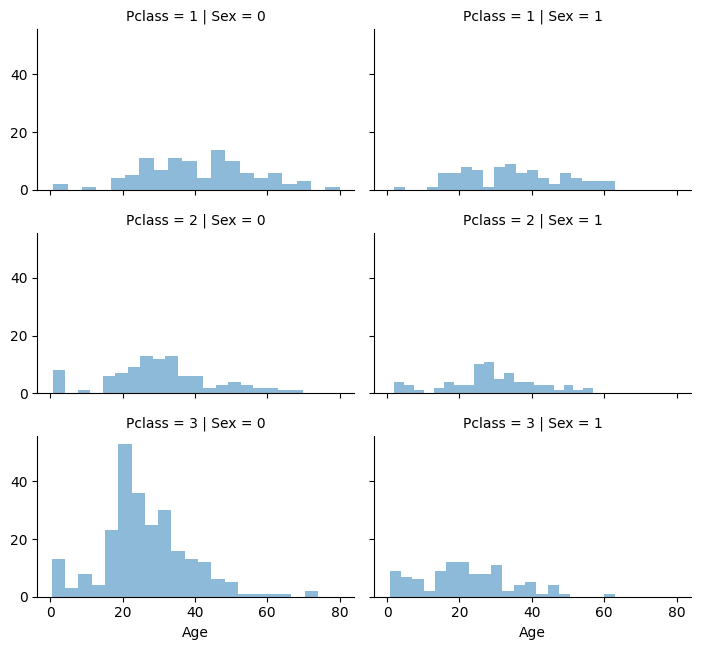

In [40]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins=20)
grid.add_legend();

In [41]:
# Empty array to contain guessed Age values based on Pclass & Gender combination
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex & Pclass to calculate guesses values of Age for the six combinations.

In [42]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) &\
            (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5   #Convert random age float to nearest 0.5 age

    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
            'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let's create Age bands & determine correlations with Survived.

In [43]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

C:\Users\kesav\AppData\Local\Temp\ipykernel_14208\3218092184.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let's replace Age with ordinals based on these bands.

In [44]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Now we remove AgeBand feature

In [45]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**Create new feature combining existing features**

FamilySize = Parch + SibSp

In [46]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [47]:
# we create another feature called IsAlone.
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Now let's drop Parch, SibSp & FamilySize in favor of IsAlone

In [48]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Create an artificial feature combining Pclass and Age.

In [49]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df.loc[:, ['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**Completing a categorical feature**

Embarked takes S,Q,C values. Training dataset has 2 missing values. We fill them with most common occurence.

In [50]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [51]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Converting categorical feature to numeric**

Convert the embarkedFill feature by creating a new numeric port feature

In [52]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


Complete the **Fare** feature for single missing value in test data using mode.

Also round off the fare to 2 decimals as it represents currency.

In [53]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

C:\Users\kesav\AppData\Local\Temp\ipykernel_14208\807047889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Create the FareBand

In [54]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)

C:\Users\kesav\AppData\Local\Temp\ipykernel_14208\109949678.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand

In [55]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [56]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


**Model - Prediction & Solve**

- There 60+ models to choose from, so we narrow down based on the type of problem & solution requirement.
- Problem = Classification & regression 
- Want to identify relationship between output(Surived or not) with other features.
- We here perform supervised learning.

So Supervised classification or regression models
- Logistic regression
- k-Nearest Neighbors
- Support Vector Machine
- Relevance Vector Machine
- Naive Bayes classifier
- Decision Tree
- Random forest
- Perceptron
- Artificial neural network

In [57]:
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']

X_test = test_df.drop("PassengerId", axis = 1).copy()
X_train.shape, X_test.shape, Y_train.shape

((891, 8), (418, 8), (891,))

**Logistic Regression**

- Measures the relationship between the categorical dependent variable(feature) & one or more independent variables by estimating probabilities using logistic function.
- We use it to validate our assumptions & decisions for feature creating & completing goals.
- It is done by calculating the coefficient of the features in the decision function.
- Positive coefficients increase the log-odds of the response & negative coefficients decrease the log-odds of the response.

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [59]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.201445
5,Title,0.397484
2,Age,0.286911
4,Embarked,0.261583
6,IsAlone,0.126942
3,Fare,-0.086368
7,Age*Class,-0.310963
0,Pclass,-0.750392


**SVM**

- Used for classification & regression analysis.
- It builds a model that assigns new test samples to one category or another, making it a non-probablistic binary linear.

In [61]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

**KNN**

- Non-parametric method, where a sample is classified by a majority vote of its neighbors.
- With the sample being assigned to the class most common among its k nearest neighbors.

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

**Naive Bayes**

- From family of probablistic classifiers based on Bayes theorem with string independence assumptions between the features.

In [65]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)
acc_nb = round(nb.score(X_train, Y_train) * 100, 2)
acc_nb

72.28

**Perceptron**

- Algorithm of binary classifiers(functions)
- Type of a linear classifier & allows for online learning.

In [66]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [67]:
# Linaer SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_lsvc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_lsvc

78.9

In [68]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.87

**Decision Tree**

- Map features(branches) to conclusions about the target values(leaves).
- Tree models where the target variable can take a finite set of values = Classification trees.
- Tree models where the target variable can take continuous values = Regression trees.
- Leaves = class labels & Branches = Conjunctions of features that lead to class labels.

In [69]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
acc_dtree = round(dtree.score(X_train, Y_train) * 100, 2)
acc_dtree

86.76

**Random forest**

- Ensemble learning method, that operate by constructing a multitude of decision trees at training time.
- And outputting the class that is the mode of the classes (classification) or mean prediction (regression) of individual trees.

In [70]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train, Y_train) * 100, 2)
acc_rf

86.76

We take Random forest as our prediction model

In [71]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred})

In [72]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
submission.to_csv("submission2.csv", index = False)